# Exploratory data analysis

In this notebook, we will illustrate exploratory data analysis briefly based on the titanic dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rc("figure", figsize=(10, 7))

In [3]:
titanic_data = pd.read_csv("titanic_survival_data.csv")

## Initial step

In [4]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


(There are a few missing values in `Age`, `fare`, and `Embarked`. We will not deal with those here)

## Variation within a variable

As examples, we will look at the numeric variable `Fare` and the categorical variable `Pclass` (passenger class).

### Visualization of variation within a variable

The variation within the variable `Pclass` is best illustrated through a bar plot, as we have already seen:

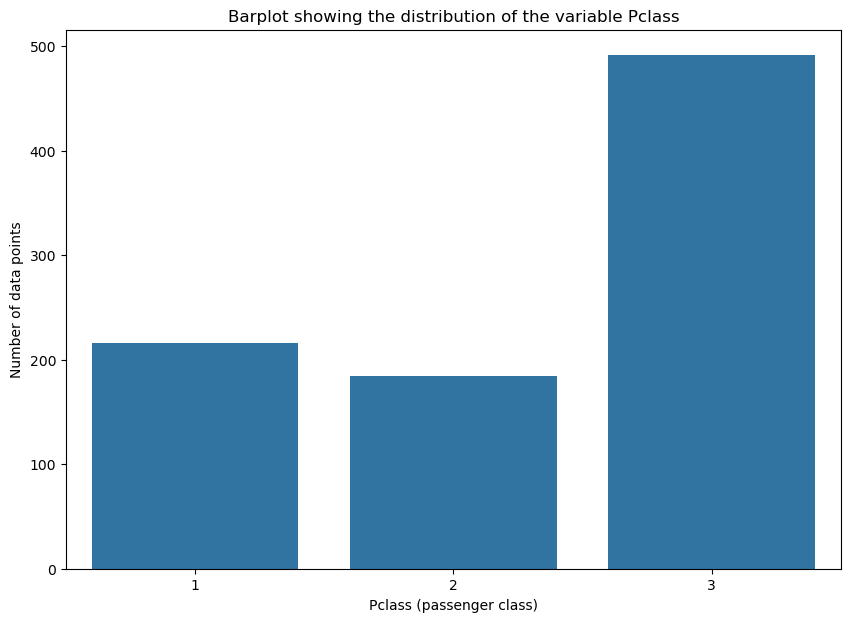

In [6]:
sns.countplot(x = "Pclass", data = titanic_data)
plt.title("Barplot showing the distribution of the variable Pclass")
plt.xlabel("Pclass (passenger class)")
plt.ylabel("Number of data points")
plt.show()

The variation of the numerical variable `Fare` can be visualised by a histogram:

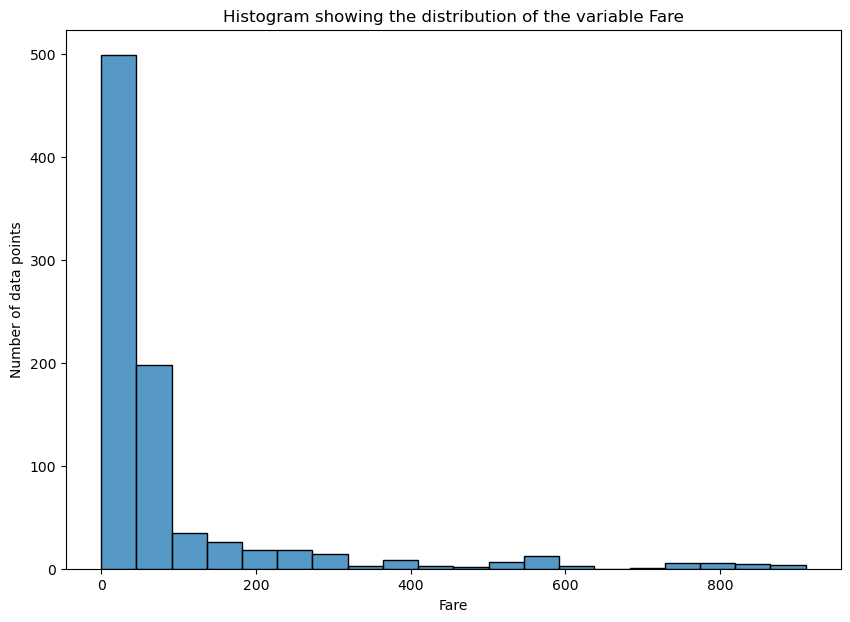

In [7]:
sns.histplot(data = titanic_data, x = "Fare", bins = 20)
plt.title("Histogram showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel("Number of data points")
plt.show()

Or through a boxplot:

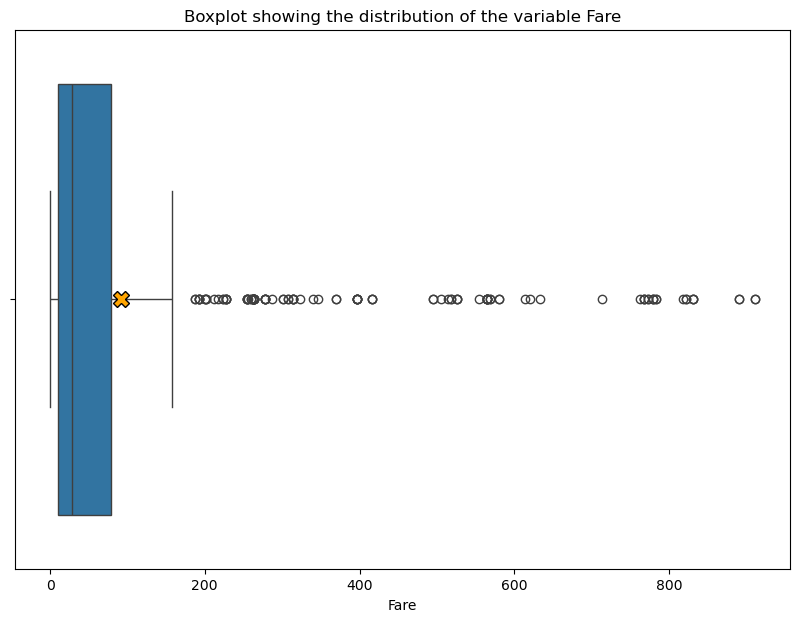

In [8]:
sns.boxplot(data = titanic_data, x = "Fare",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel(None)
plt.show()

### Quantification of variation within a variable

For the categorical variable `Pclass`, quantifying the variation of it just amoun to couting how many of each category occurs in the dataset. This is easily achied using `value_counts`.

In [9]:
titanic_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

For the numeric variable `Fare` there several descriptive statistics we might want to calculate. The `describe` method give us most of them:

In [10]:
titanic_data[["Fare"]].describe()

,Fare
count,868.000000
mean,91.288425
std,159.991488
min,0.000000
25%,10.500000
50%,27.825000
75%,78.958000
max,910.792000


Clearly the distribution is very left-skewed as the mean is much larger than the median.

## Variation between two variables

There are three cases: both variables are categorical, one variable is numeric and one is categorical, and both variables are numeric. We go through each of these cases separately.

### Variation between two categorical variables

For this case, we look at the variables `Pclass` and `Survived`.

To visualize the relationship between two categorical variables, we use the mosaic plot from the statsmodels package:

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

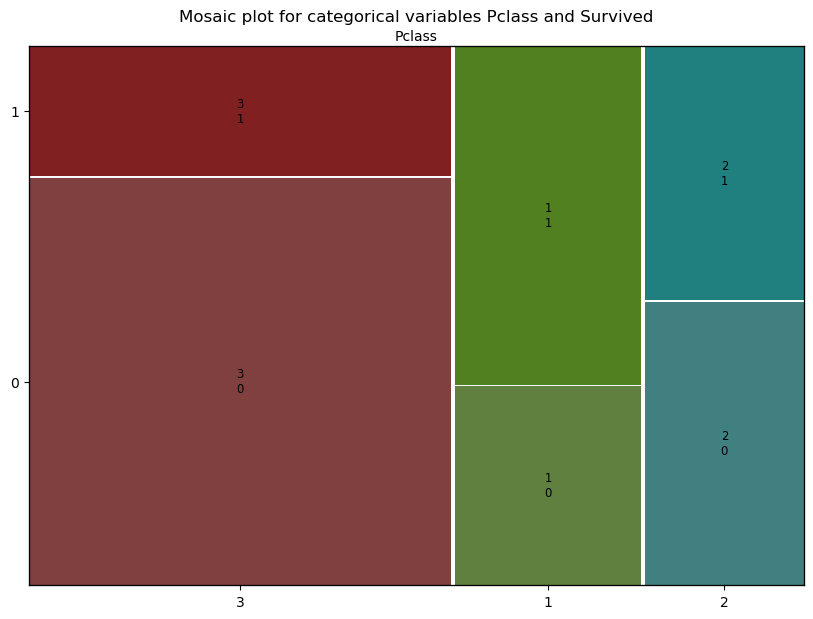

In [12]:
mosaic(titanic_data, ["Pclass", "Survived"])
plt.title("Mosaic plot for categorical variables Pclass and Survived")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

For the descriptive statistics we can do a cross table using pandas:

In [13]:
pd.crosstab(titanic_data["Pclass"], titanic_data["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Variation between a numeric and a categorical variabel

For this case we look at the variable `Fare` and `Pclass`.

For visualzing the variation between the two variables, we do boxplots:

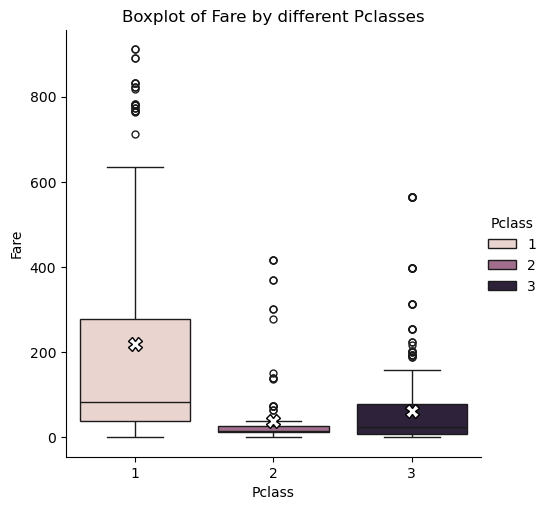

In [14]:
sns.catplot(x="Pclass", y = "Fare", hue = "Pclass", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of Fare by different Pclasses")
plt.show()

For descriptive statistics, we just calculate the same as for the variable `Fare`, but grouped by the `Pclass`variable.

In [15]:
FarebyPclass = titanic_data["Fare"].groupby(titanic_data["Pclass"]).describe()
FarebyPclass["median"] = titanic_data["Fare"].groupby(titanic_data["Pclass"]).median()
FarebyPclass

,count,mean,std,min,25%,50%,75%,max,median
Pclass,,,,,,,,,
1,193.0,219.548497,260.651629,0.0,38.500,83.475,277.208,910.792,83.475
2,184.0,37.447511,72.897002,0.0,13.000,15.025,26.000,415.792,15.025
3,491.0,61.049187,90.561775,0.0,7.925,23.250,78.958,564.958,23.250


### Variation between two numeric variables

For this case, we look at the variables `Fare` and `Age`.

For visualizing the variation between the two numeric variables, we do a scatterplot.

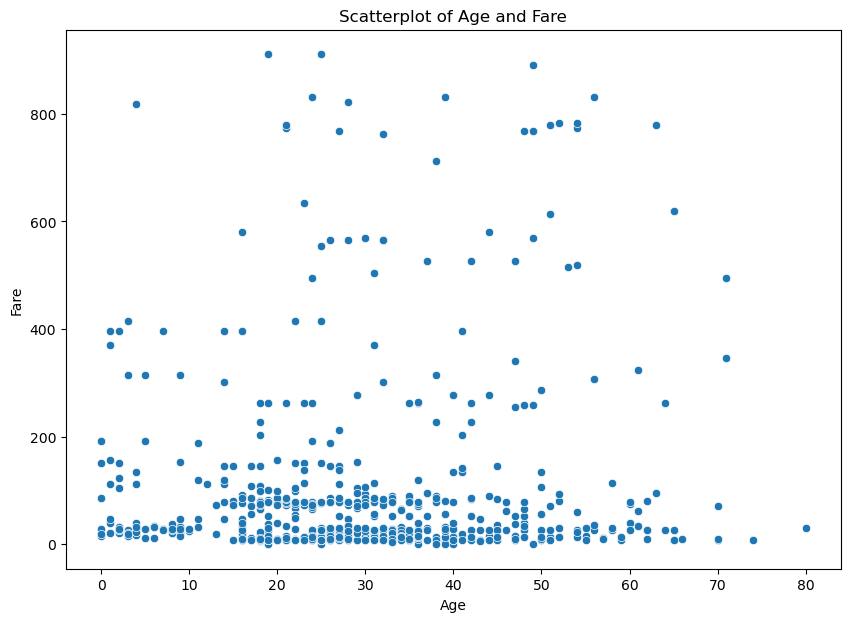

In [16]:
sns.scatterplot(data = titanic_data, x = "Age", y = "Fare")
plt.title("Scatterplot of Age and Fare")
plt.show()

Or with the regression line (more about this when we talk about regression in a few classes from now)

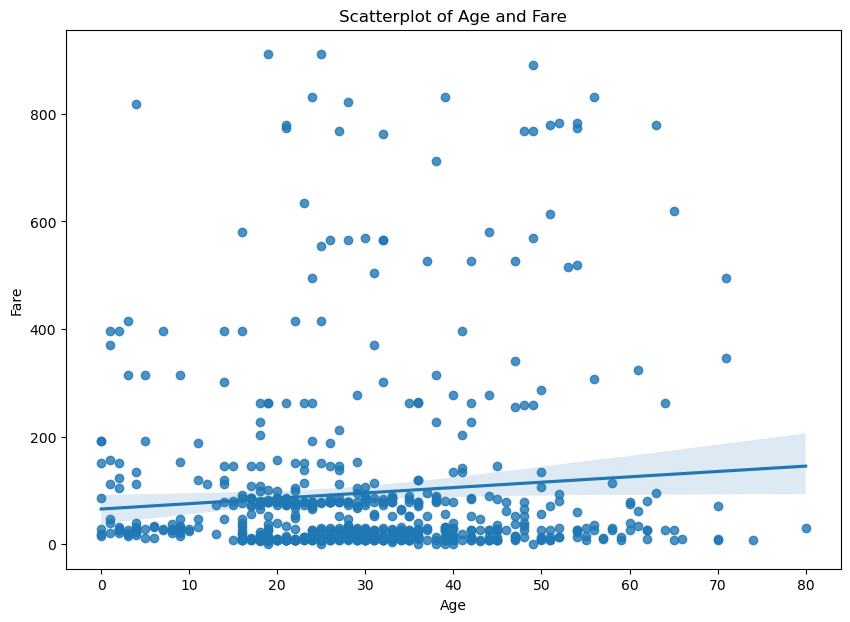

In [17]:
sns.regplot(x = "Age", y = "Fare", data = titanic_data)
plt.title("Scatterplot of Age and Fare")
plt.show()

To calculate the relevant statistics, we calculate the correlation between the two variables.

In [18]:
# In pandas (dropping missing values implicitly?!)
titanic_data["Age"].corr(titanic_data["Fare"])

0.08717792871017918

In [19]:
# In Scipy
from scipy.stats import pearsonr
pearsonr(titanic_data["Age"], titanic_data["Fare"])

PearsonRResult(statistic=nan, pvalue=nan)

We need to remove the missing values for SciPy to make the proper calculation.

In [20]:
titanic_data_nonan = titanic_data[["Age", "Fare"]].dropna()

In [21]:
titanic_data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     694 non-null    float64
 1   Fare    694 non-null    float64
dtypes: float64(2)
memory usage: 16.3 KB


In [22]:
# In Scipy
from scipy.stats import pearsonr
pearsonr(titanic_data_nonan["Age"], titanic_data_nonan["Fare"])

PearsonRResult(statistic=0.08717792871017914, pvalue=0.021627948368120042)

Note that we got the exact same value as when using pandas. Thus, pandas also seems to be removing all missing values, which make sense. (The pvalue, we will talk much more about next time...)